In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
np.random.seed(42) # для воспроизводимости

In [38]:
train_data = pd.read_csv(r"C:\Users\isapa\Desktop\train.csv")
test_data = pd.read_csv(r"C:\Users\isapa\Desktop\test.csv")
display(train_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
rows, cols = train_data.shape
print(f"В таблице {rows} строк и {cols} столбцов")

В таблице 891 строк и 12 столбцов


In [40]:
# Проверка и обработка пропусков
print('Пропуски в train:')
print(train_data.isnull().sum())
print('\nПропуски в test:')
print(test_data.isnull().sum())

# Заполнение числовых пропусков медианой, категориальных — модой
for col in train_data.columns:
    if train_data[col].isnull().any():
        if train_data[col].dtype == 'object':
            train_data[col].fillna(train_data[col].mode()[0], inplace=True)
        else:
            train_data[col].fillna(train_data[col].median(), inplace=True)
for col in test_data.columns:
    if test_data[col].isnull().any():
        if test_data[col].dtype == 'object':
            test_data[col].fillna(test_data[col].mode()[0], inplace=True)
        else:
            test_data[col].fillna(test_data[col].median(), inplace=True)

Пропуски в train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Пропуски в test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


C:\Users\isapa\AppData\Local\Temp\ipykernel_18444\1854406600.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
C:\Users\isapa\AppData\Local\Temp\ipykernel_18444\1854406600.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

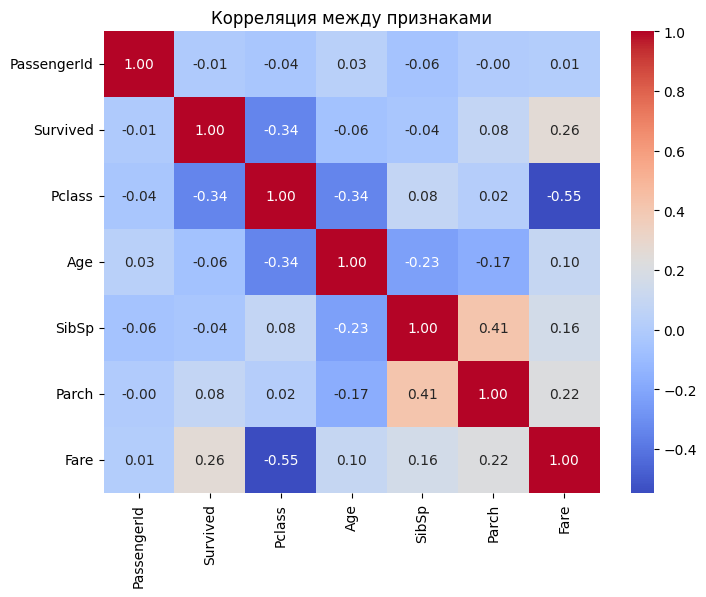

In [41]:
# Визуализация корреляций
plt.figure(figsize=(8,6))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между признаками')
plt.show()

C:\Users\isapa\AppData\Local\Temp\ipykernel_18444\1232972343.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_data, palette='Set2')


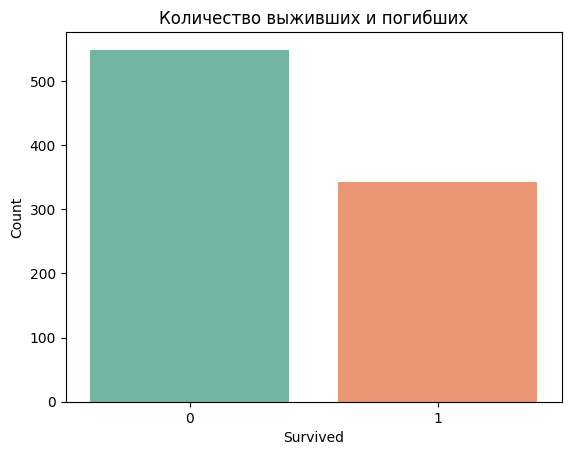

In [42]:
sns.countplot(x='Survived', data=train_data, palette='Set2')
plt.title('Количество выживших и погибших')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

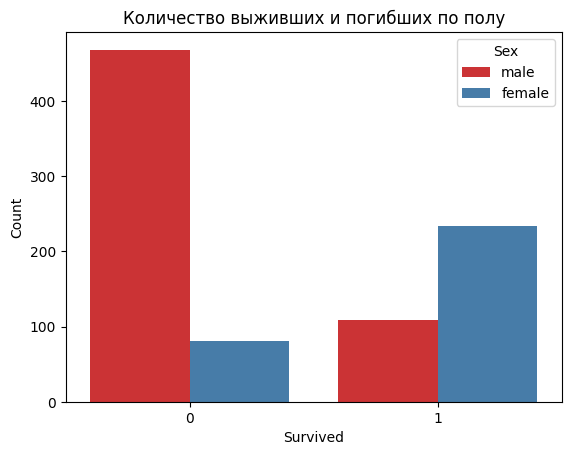

In [43]:
sns.countplot(x='Survived', hue='Sex', data=train_data, palette='Set1')
plt.title('Количество выживших и погибших по полу')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

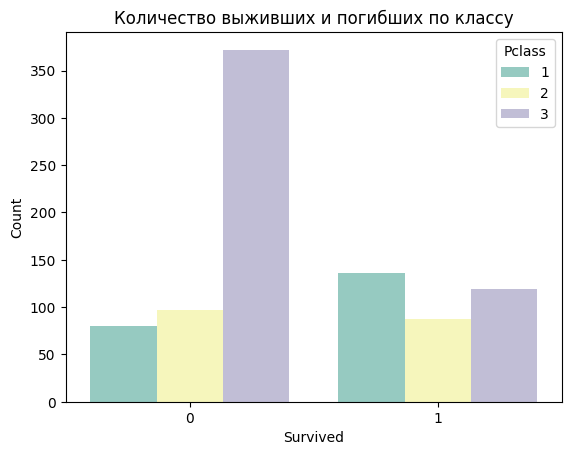

In [44]:
sns.countplot(x='Survived', hue='Pclass', data=train_data, palette='Set3')
plt.title('Количество выживших и погибших по классу')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [45]:
# Выбор признаков и подготовка данных
features = ['Pclass', 'Sex', 'Parch', 'SibSp']
y = train_data['Survived']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Приведение к одинаковым столбцам
X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)
display(X.head())

,Pclass,Parch,SibSp,Sex_female,Sex_male
0,3,0,1,False,True
1,1,0,1,True,False
2,3,0,0,True,False
3,1,0,1,True,False
4,3,0,0,False,True


In [46]:
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Ваш файл my_submission.csv был успешно сохранен!")

Ваш файл my_submission.csv был успешно сохранен!


In [47]:
# Accuracy на обучающей выборке
train_preds = model.predict(X)
accuracy = accuracy_score(y, train_preds)
print(f"Accuracy на обучающей выборке: {accuracy:.4f}")

Accuracy на обучающей выборке: 0.8159


,Feature,Importance
3,Sex_female,0.321703
4,Sex_male,0.315208
0,Pclass,0.212097
2,SibSp,0.078355
1,Parch,0.072637


C:\Users\isapa\AppData\Local\Temp\ipykernel_18444\2595881126.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


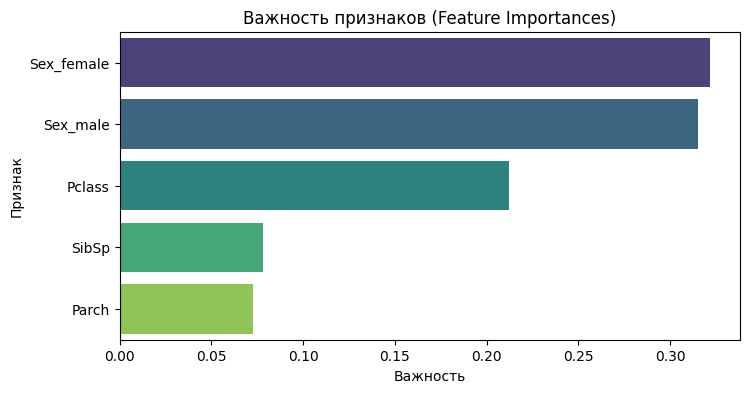

In [49]:
# Важность признаков: таблица и график
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False)
display(feat_imp)
plt.figure(figsize=(8,4))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title('Важность признаков (Feature Importances)')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

RandomForest accuracy на обучающей выборке: 0.8159
GradientBoosting accuracy на обучающей выборке: 0.8159
LogisticRegression accuracy на обучающей выборке: 0.8002


C:\Users\isapa\AppData\Local\Temp\ipykernel_18444\2170813858.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='mako')


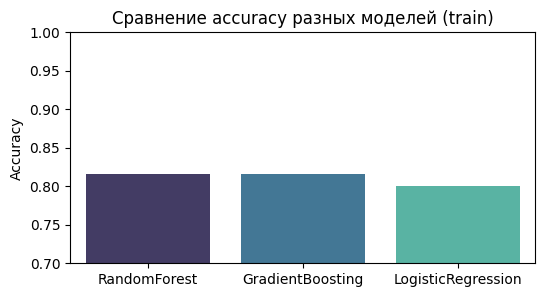

Файл my_submission_best.csv сохранён с моделью: RandomForest


In [50]:
# Сравнение нескольких моделей для повышения accuracy
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

accuracies = {}
for name, clf in models.items():
    clf.fit(X, y)
    preds = clf.predict(X)
    acc = accuracy_score(y, preds)
    accuracies[name] = acc
    print(f"{name} accuracy на обучающей выборке: {acc:.4f}")

# Визуализация сравнения accuracy
plt.figure(figsize=(6,3))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='mako')
plt.title('Сравнение accuracy разных моделей (train)')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.show()

# Для финального прогноза используем лучшую модель
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
final_predictions = best_model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': final_predictions})
output.to_csv('my_submission_best.csv', index=False)
print(f"Файл my_submission_best.csv сохранён с моделью: {best_model_name}")